<a href="https://colab.research.google.com/github/matheuscantalejo/projeto_governan-a_uni9/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static
import random
from sklearn.metrics import mean_absolute_error, mean_squared_error

!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df  = pd.read_csv('/content/ocorrencias_cenipa.csv')

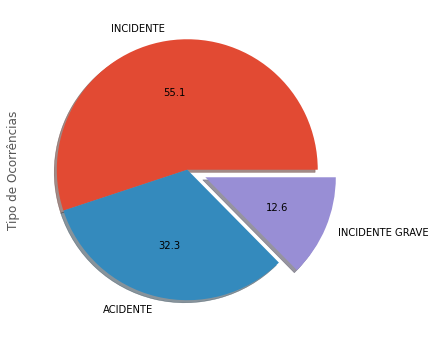

In [ ]:
# Vamos separar os incidentes, incidentes graves e os acidentes

x=df['tipo'].value_counts()
ex=(0.0, 0.0, 0.15)
x.plot.pie(label="Tipo de Ocorrências", autopct='%1.1f', explode=ex, shadow=True, figsize=(6,6))


É evidentemente que os **incidentes** podendo ser visualizados no gráfico a cima é o tipo mais comum, tendo 55.1%.<br>
Sendo o **incidentes grave** tendo o percentual de 12.6% bem como os **acidente** 32.3%. 


In [ ]:
df.columns.values

array(['codigo', 'tipo', 'descricao', 'cidade', 'estado', 'data', 'ano',
       'hora', 'aeronave_liberada', 'status_investigacao',
       'aeronaves_envolvidas', 'ocorrencia_saida_pista', 'aeronave_tipo',
       'aeronave_fabricante', 'motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_pais_fabricante', 'aeronave_fase_operacao',
       'aeronave_nivel_dano'], dtype=object)

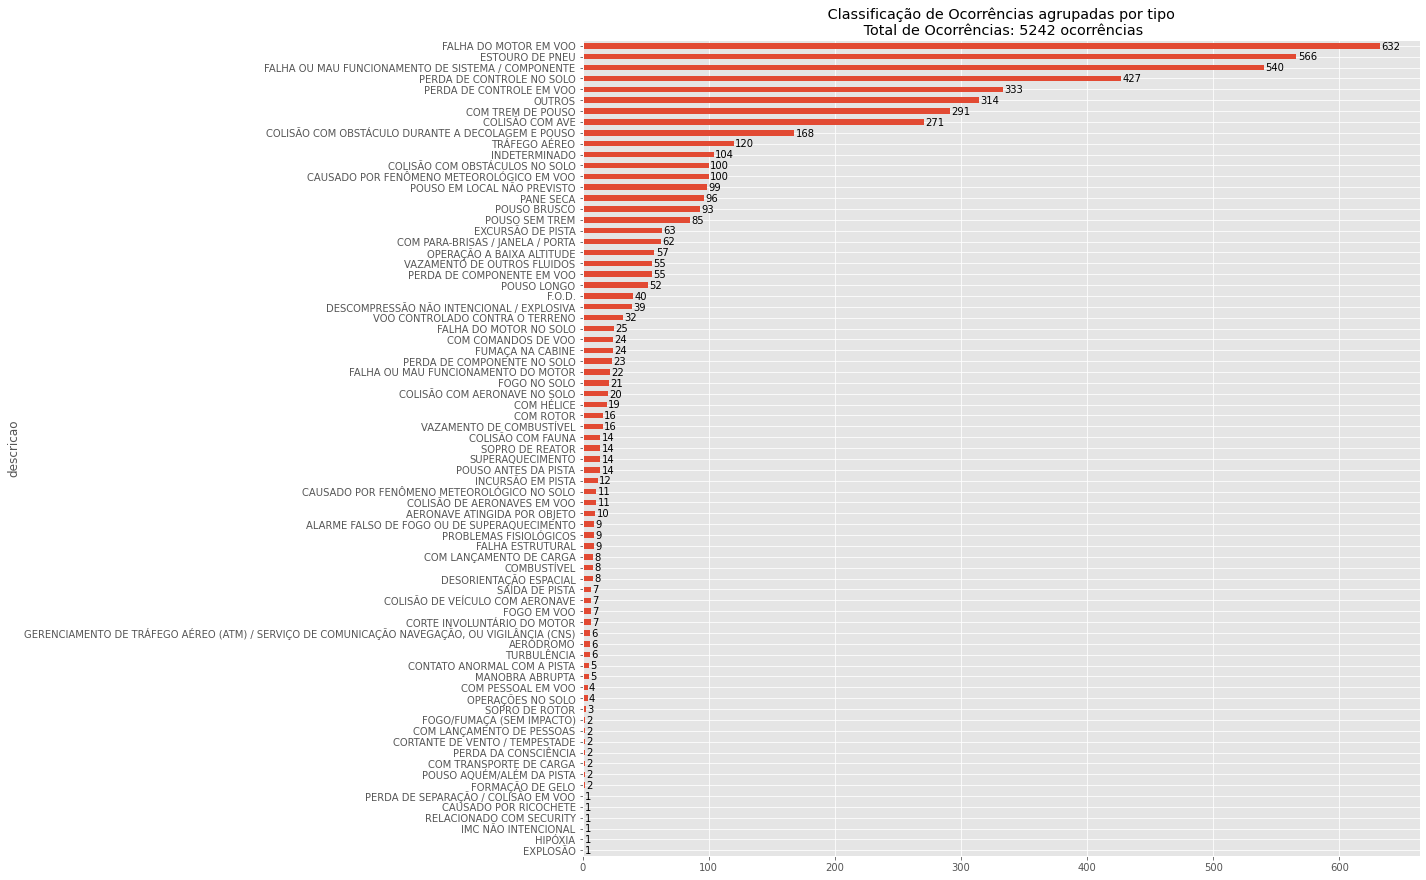

In [ ]:
# Utilizando novo parâmetro para conseguir mostrar em visualização do gráfico a quantidade de ocorrências
df['contagem'] = 1
ax = df.groupby('descricao')['contagem'].sum().sort_values().plot(kind='barh', figsize=(15, 15))

for p in ax.patches:
  b= p.get_bbox()
  ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title(' Classificação de Ocorrências agrupadas por tipo \n Total de Ocorrências: ' + str(df['contagem'].sum()) + ' ocorrências')
plt.show()



É notável que a **Falha de Motor em Voo** é o principal motivo para que haja acidentes, com o percentual notavelmente maior que a explosão.

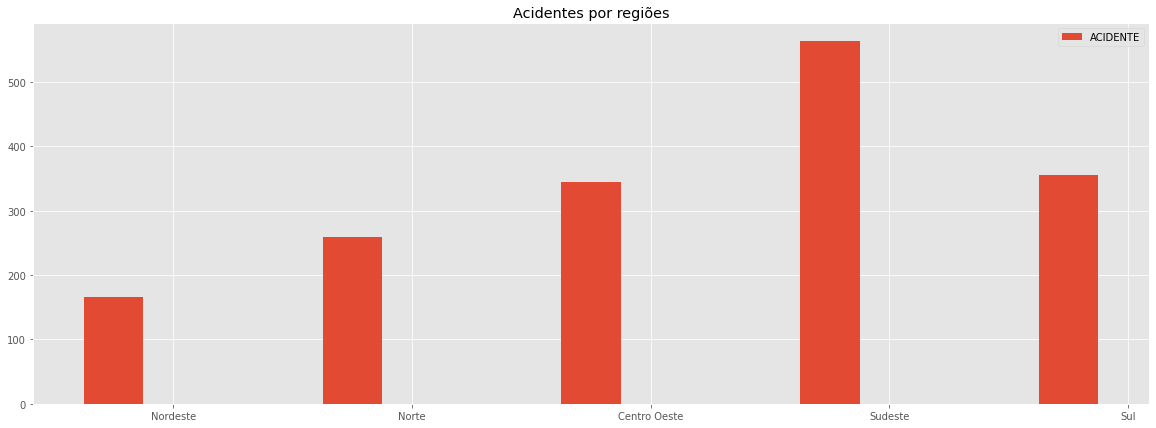

In [ ]:
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipo = ['ACIDENTE']
dic_01 = {i: [ len([k for k in list(df.loc[df['tipo'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipo}

dic_01['Região'] = list(dic_regioes.keys())
ocorrencias_regioes = pd.DataFrame(dic_01)

#Visualizando melhor em um gráfico
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(20, 7))

width = 0.25
x1 = np.arange(5)
x2 = [ x + width for x in x1]
x3 = [ x + width for x in x2]

rects1 = ax.bar(x1, ocorrencias_regioes['ACIDENTE'], width, label='ACIDENTE')

ax.set_title('Acidentes por regiões')
ax.set_xticks(x2)
ax.set_xticklabels(ocorrencias_regioes['Região'])
ax.legend()
plt.show()

Nos gráficos sendo apresentado, nos deparamos com um grande indíce de acidentes aéreos que acontecem na região **Sudeste**.
Sendo também surpreendidos que a região do **Nordeste**, é a região com menos indíce de acidente.

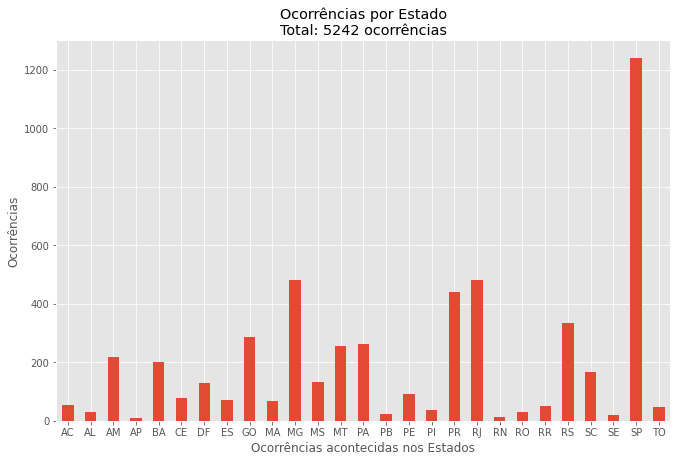

In [ ]:
#Filtrando somente os estados e verificando qual o estado que apresenta o maior número de ocorrências
ax_estados_brasil =  df.groupby('estado')['contagem'].sum().plot(kind='bar', figsize=(11,7))

plt.xlabel('Ocorrências acontecidas nos Estados')
plt.ylabel('Ocorrências')
plt.title('Ocorrências por Estado\nTotal: ' + str(df['contagem'].sum()) + ' ocorrências')
plt.xticks(rotation=0)
plt.show()

Apresentado o gráfico a cima, o estado de SP foi o que mais ocorreu ocorrências aéreas, pode ser por conta que São Paulo é conhecido por ser o estado com mais aeroportos do Brasil, o que nos permite pensar que esse é o motivo de tantos incidentes, porém, outros estados com muitos aeroportos como Goiás, Maranhão, Mato Grosso e Mi Nas Gerais pontuaram muito abaixo de São Paul, porém não. 



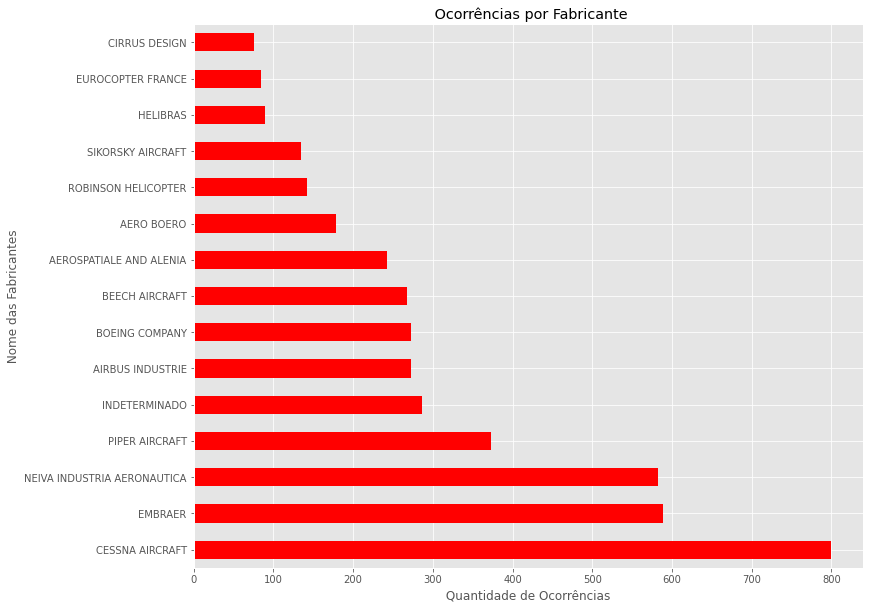

In [ ]:
categoria = df.groupby('aeronave_fabricante')['contagem'].sum().sort_values(ascending = False)
categoria.head(15).plot(kind='barh', figsize=(12, 10), color='red')
plt.title(' Ocorrências por Fabricante')
plt.ylabel(' Nome das Fabricantes ')
plt.xlabel(' Quantidade de Ocorrências ')
plt.show()


A **CESSNA AIRCRAFT ** é menos seguro por ser avião de pequeno porte e não ser 100% seguro e não ter as manuntenções periódiocas devidas apresentado no gráfico. Ocupando também é o menor indíce de acidentes, o avião de pequeno porte **CIRRUS DESIGN** e mesmo ambos sendo comuns em característica de porte, o que torna diferente do CESSNA é a sua melhor performance, controle e montagem de motor, resultando assim em menos índices de acidentes e um voo mais seguro.

Text(0.5, 0, 'Ano')

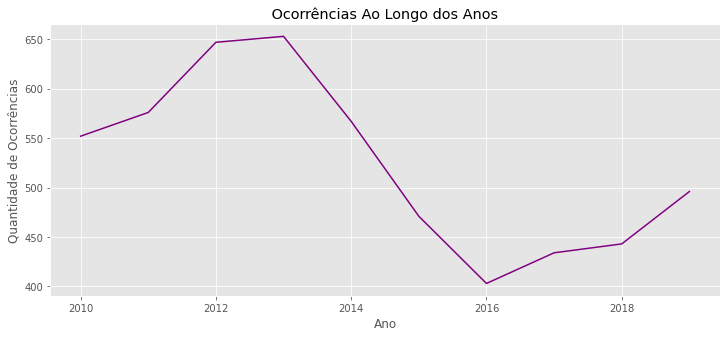

In [ ]:
df.groupby('ano')['contagem'].sum().plot(color='purple', figsize=(12,5), grid=True)
plt.title(' Ocorrências Ao Longo dos Anos ')

plt.ylabel('Quantidade de Ocorrências')
plt.xlabel('Ano')


Surpreendentemente o ano de 2013 foi o ano a qual aconteceu o maior indíce de ocorrências devido as falhas de controle de voo, sendo assim, as companhias áereas e instrutores de voo perceberam que era melhor um treinamento mais performático resultando em menos acidentes nos anos seguintes.

Text(0.5, 0, 'Tipos de Aeronaves')

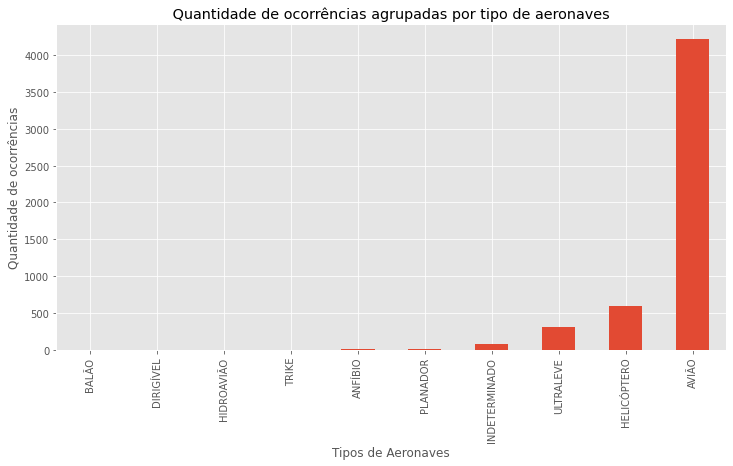

In [ ]:
#aeronave_tipo

ax = df.groupby('aeronave_tipo')['contagem'].sum().sort_values().plot(kind='bar', figsize=(12, 6))

plt.title(' Quantidade de ocorrências agrupadas por tipo de aeronaves ')
plt.ylabel('Quantidade de ocorrências')
plt.xlabel('Tipos de Aeronaves')


Analisada ao gráfico, o **AVIÃO ** é o veículo áereo contido com maior número de ocorrências sendo a maior causa dos acidentes devido falhas de motor, seguida de perto da perda de controle em voos. 

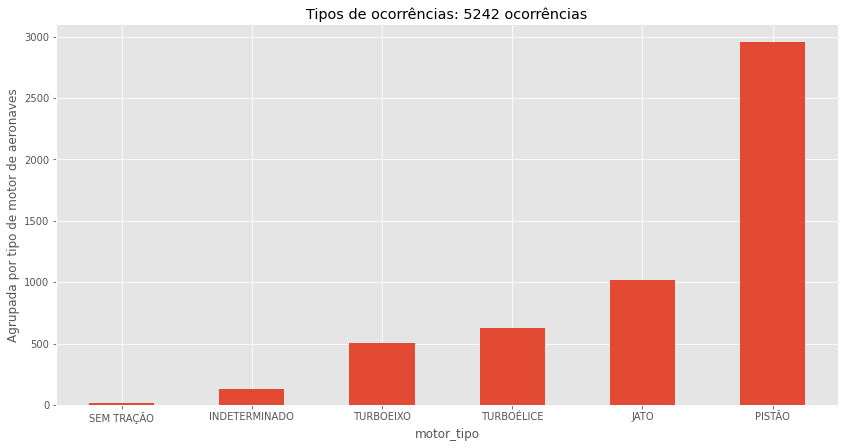

In [ ]:
ax = df.groupby('motor_tipo')['contagem'].sum().sort_values().plot(kind='bar', figsize=(14,7))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.title('Tipos de ocorrências: '+str(df['contagem'].sum())+' ocorrências')
plt.ylabel('Agrupada por tipo de motor de aeronaves')
plt.xticks(rotation=0)
plt.show()

Motores de pistão dominaram com os maiores acertos de rendimento. Este motor é um dos motores aeronáuticos mais antigos (ou mesmo usados) do mundo e é muito comum em aeronaves monomotoras. Além de serem de baixo custo, são semelhantes aos motores de automóveis, mas são tratados com padrões de qualidade e confiabilidade aeronáutica e funcionam bem em baixas altitudes.

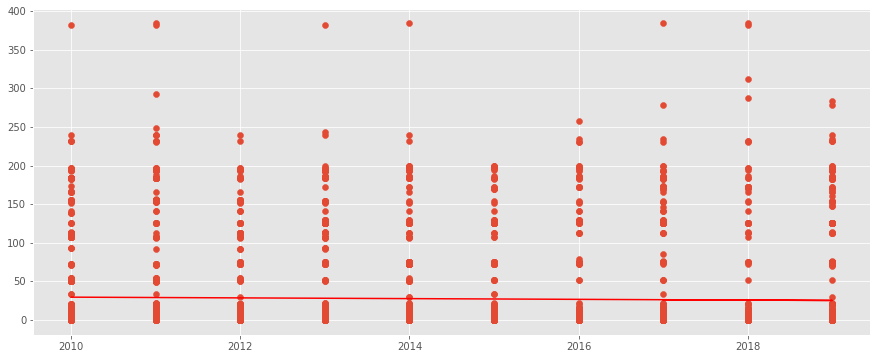

In [ ]:
#Criando e separando o dataframe
dataframe = pd.DataFrame()
dataframe['x'] = df['ano']
dataframe['y'] = df['aeronave_assentos']
x_values = dataframe[['x']]
y_values = dataframe[['y']]
# plotando o gráfico da regressão
plt.figure(figsize=(15,6))

plt.scatter(dataframe['x'].values, dataframe['y'].values)
# Fazendo a linha de regressão
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
linha = np.poly1d(fit)
# plotando um gráfico em cima do outro
plt.plot(dataframe['x'].values, linha(dataframe['x'].values), 'r')
plt.show()

É visível deparamos que o eixo X responsável pelo ano das ocorrências das aeronaves que se envolveram em acidentes, assim o eixo Y ele é responsável pela quantidades de assentos das aeronaves. 

Reparando nos pontos vermelhos emitidos devido aos assentos aéreos, é notável que quanto menos número de assentos a aeronave tiver, maior o número de acidentes independente do ano.
Segundo o site [economia uol](https://economia.uol.com.br/todos-a-bordo/2021/11/11/aviao-pequeno-grande-mais-seguro-inseguro-acidente-aviacao.htm), levantaram uma grande questão "Aviões pequenos são mais perigosos do que os grandes?", afinal, baseado nas informações extraídas para a análise dos acidentes aéreos é bem verdade que os aviões de pequeno porte assume a grande maioria dos acidentes aéreos, porém não quer dizer que são menos seguros, porém trata-se do padrões de operação e exigência em cada categoria de aviação. 
Creio que uma reavaliação do protocolo de segurança e um acompanhamento, pode impactar e trazer melhorias nas aeronaves de pequeno porte, pode ser um inicio para diminuirmos o problema apresentado no gráfico.

# Considerações Finais

O objetivo deste trabalho foi atráves da análise de dados em acidentes áereos ocorridos no Brasil entre o ano de 2010 e 2019 tentando mostrar e apresentar uma solução para diminuir de aviação nacional.

Os dados utilizados para extração e formulação de gráficos foram disponbilizados por Opendata AIG Brazil, a base de dados de ocorrências aeronáuticas que é gerenciado pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA).
Os resultados obtidos da análise de dados na aviação nacional entre o ano de 2010 e 2019 foram:

* Uma das principais causas de acidentes em aviões são falha do motor em voo, seguido de estouro do pneu, falha ou mau funcionamento do sistema e perda de controle no solo.
* Os acidentes aéreos têm uma grande concentração no Sudeste sendo a região com maior concentração de ocorrências em números absolutos, sendo a região do nordeste a com menos indíces de acidentes.
* A fabricante Cessna Aircraft é o modelo com maior número de casos ocupando em porcentagem 23,51% do total sendo o avião de pequeno porte o principal veículo aéreo sendo 4.213 mil acidentes.

# Conclusão

O trabalho realizado despertou nossa curiosidade e de forma visual, tivemos dados apresentados de acidentes aéreos na aviação brasileira entre os anos de 2010 a 2019. 

Analisando os dados coletados, observou-se que o número de incidentes e aeronaves diferiram, sem distinguir o que aconteceu. Ao processar os dados, notou-se que a maioria dos casos foi causada por fatores externos, e na maioria das vezes houve pouco ou nenhum dano à aeronave. Nessa análise, fica claro que a investigação sobre esses eventos foi proposital, com o CENIPA registrando o maior número de eventos em 2013 e o menor em 2016.

Quando se trata de acidentes aéreos, o apoio e a investigação de todos os envolvidos são necessários e mobilizados para cumprir os protocolos e regras estabelecidas. Dados os dados, pode-se dizer que os voos são geralmente seguros comparados aos outros meios de transporte.

#Referências Bibliográficas 

Matheus, Yuri. **Criando Graficos no Python com a Matplotlib.** Alura, 2018. Disponível em: https://www.alura.com.br/artigos/criando-graficos-no-python-com-a-matplotlib?gclid=Cj0KCQjwheyUBhD-ARIsAHJNM-Mtlg7bPOcGguz_xad6oc031fV0eOeZoEsvcgBuV_dEAWQfV5djcxkaAjtkEALw_wcB


**O que é regressão linear?**. Psicometria Online, 2021. Disponível em: https://psicometriaonline.com.br/o-que-e-regressao-linear-simples-2/

Vidigal, Lucas. **Acidentes aereos no brasil desde 2011**. G1, 2021. Disponível em: https://g1.globo.com/mg/vales-mg/noticia/2021/11/10/acidentes-aereos-no-brasil-desde-2011.ghtml

**Pacote pandas para machine learning**. Didática Tech, 2021. Disponível em: https://didatica.tech/o-pacote-pandas-python-para-machine-learning/


Keller, Fernando. **Maioria dos acidentes aéreos são com aviões de pequeno porte no Brasil**. dm.com.br, 2021. Disponível em https://www.dm.com.br/cotidiano/2021/11/maioria-dos-acidentes-aereos-sao-com-avioes-de-pequeno-porte-no-brasil/

Wolff, Italo. **Por que acidentes com avioes pequenos sao maioria. Jornal Opção, 2022.** Disponível em: https://www.jornalopcao.com.br/reportagens/por-que-acidentes-com-avioes-pequenos-sao-maioria-364152/

Souza, Felipe; MACHADO, Leandro. **Morte de Marília Mendonça: acidentes com aviões de pequeno porte são grande maioria no Brasil. **BBC News Brasil, São Paulo, 2021 .Disponível em: https://www.bbc.com/portuguese/brasil-59185456. 

MACHADO, Alysson. **Biblioteca Matplotlib do Python.** Medium, 2020.Disponível em:https://medium.com/@alyssonmachado388/biblioteca-matplotlib-do-python-5e32104439d0. Acesso em: 7 de nov. 2021

SCHÖNHOFEN, Ricardo D.. **Biblioteca Seaborn com o matplotlib.** Vooo, 2017.Disponível em:https://www.vooo.pro/insights/biblioteca-seaborn-com-o-matplotlib/. Acesso em: 7 de nov. 2021
